# Plotting Figure 1 of DynX Data
> Domain of linearity of discrete shape derivative for Acoustic Duct

**Info**:
- the data for this figure is build in dynX

Slope LRF: -84.6159383986668
Slope Dynx: -84.45922242737166


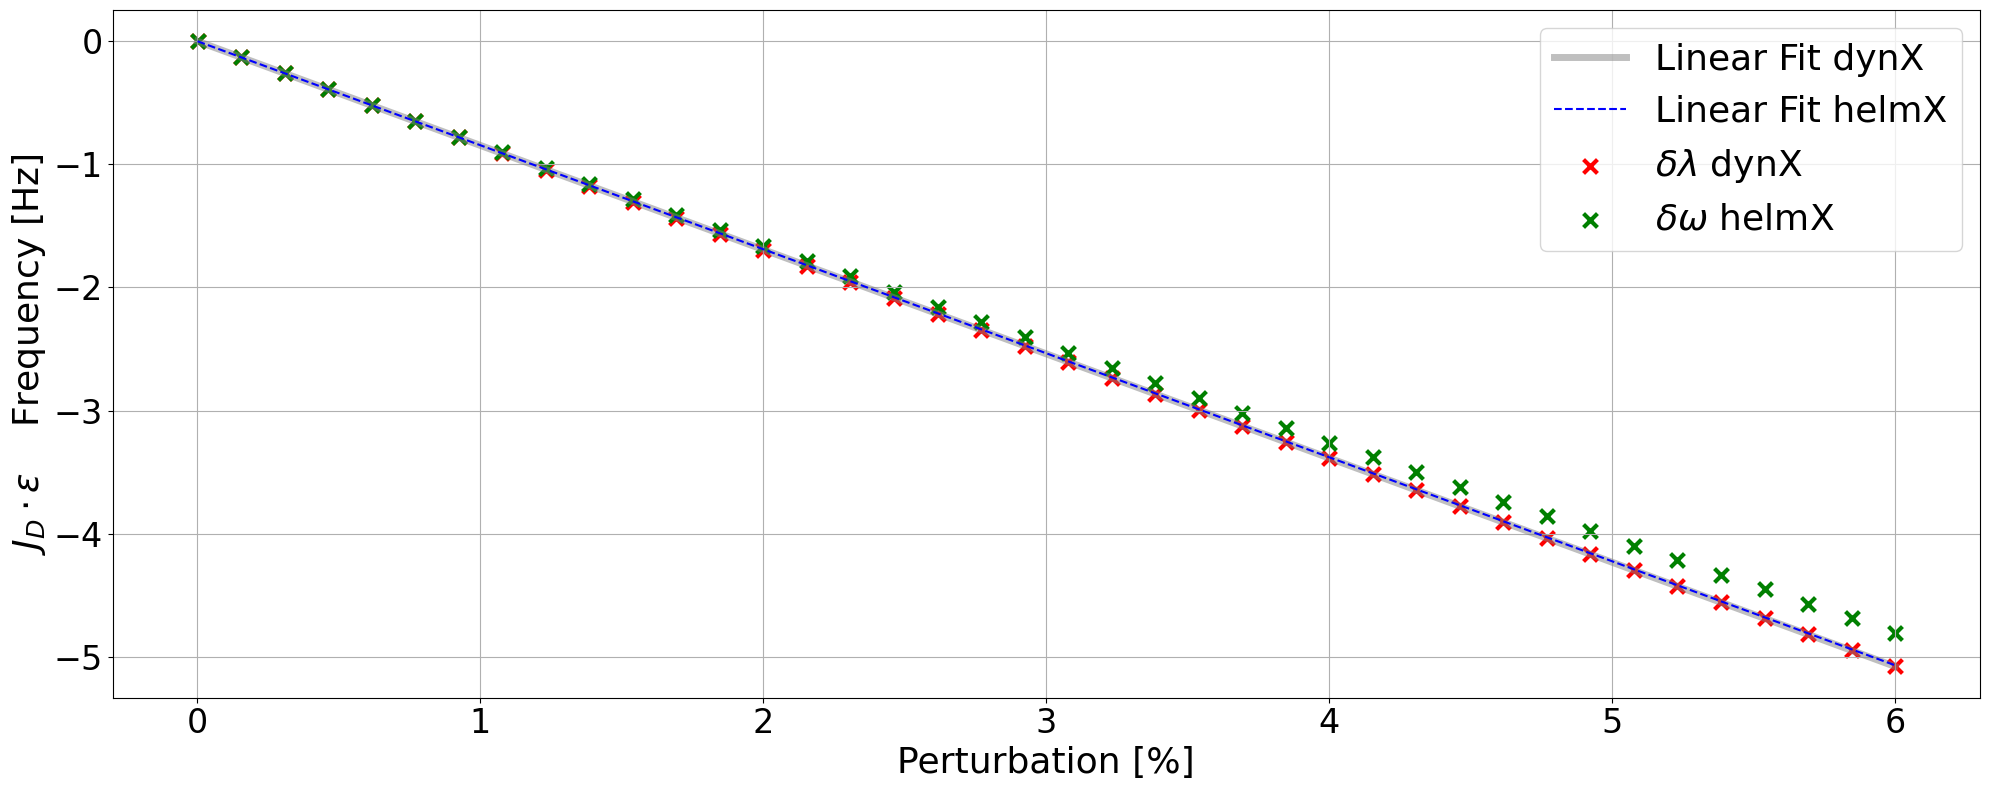

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fontsize = 26
os.chdir(os.path.join(os.getcwd()))
parent_path = os.path.dirname(os.getcwd())
file = os.path.join('dynx_data_fig1.txt')
file2 = os.path.join(parent_path, 'data_fig4.txt')

with open(file, 'r') as f:
    lines = f.readlines()
with open(file2, 'r') as f2:
    lines2 = f2.readlines()

# dynx
perturbations1 = []
discrete_shape_derivatives1 = []
# helmx
perturbations2 = []
discrete_shape_derivatives2 = []

# read the data from the file
for line in lines[1:]: # skip the first line
    p, der = line.strip().split(',')
    perturbations1.append(float(p))
    discrete_shape_derivatives1.append(float(der))
# transform the lists into numpy arrays to perform operations
perturbations1 = np.array(perturbations1)

# read the data from the file
for line2 in lines2[1:]: # skip the first line
    p2, der2 = line2.strip().split(',')
    perturbations2.append(float(p2))
    discrete_shape_derivatives2.append(float(der2))
# transform the lists into numpy arrays to perform operations
perturbations2 = np.array(perturbations2)


# create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))

# Fit a linear line to the first few data points
slope, intercept = np.polyfit(perturbations1[:2], discrete_shape_derivatives1[:2], 1)
linear_fit = slope * perturbations1 + intercept
print('Slope LRF:', slope)
ax.plot(perturbations1*100, linear_fit, color='grey', label='Linear Fit dynX', linewidth=5, alpha=0.5)

slope2, intercept2 = np.polyfit(perturbations2[:2], discrete_shape_derivatives2[:2], 1)
linear_fit2 = slope2 * perturbations2 + intercept2
print('Slope Dynx:', slope2)
ax.plot(perturbations2*100, linear_fit2, 'b--', label='Linear Fit helmX')


# plot the real part of shape derivatives
ax.scatter(perturbations1*100, discrete_shape_derivatives1, color='red', marker='x', label=r'$\delta \lambda$ dynX', s=100, linewidth=3)
ax.scatter(perturbations2*100, discrete_shape_derivatives2, color='green', marker='x', label=r'$\delta \omega$ helmX', s=100, linewidth=3)
# set labels and title
ax.set_xlabel(r'Perturbation [%]', fontsize=fontsize)
ax.set_ylabel(r'$J_D \cdot \epsilon$    Frequency [Hz]', fontsize=fontsize)
ax.legend(loc='upper right')
ax.legend(fontsize=fontsize)
ax.grid(True)

#plt.ylim(min(discrete_shape_derivatives)-1e-6, max(discrete_shape_derivatives)+7e-6)  # Set y-axis limits based on data
#plt.yticks(discrete_shape_derivatives[::5])  # Set specific ticks
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
# Increase the font size of the axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout() # make plot look better
plt.show() # show the plot

# Save the figure to the 'Images/' folder
fig.savefig(os.path.join(parent_path, 'Images/', 'Fig1Dynx.png'))